In [ ]:
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
import sys

# this is needed when importing from the notebooks folder
sys.path.append("../")
from lobster import Lightcurve

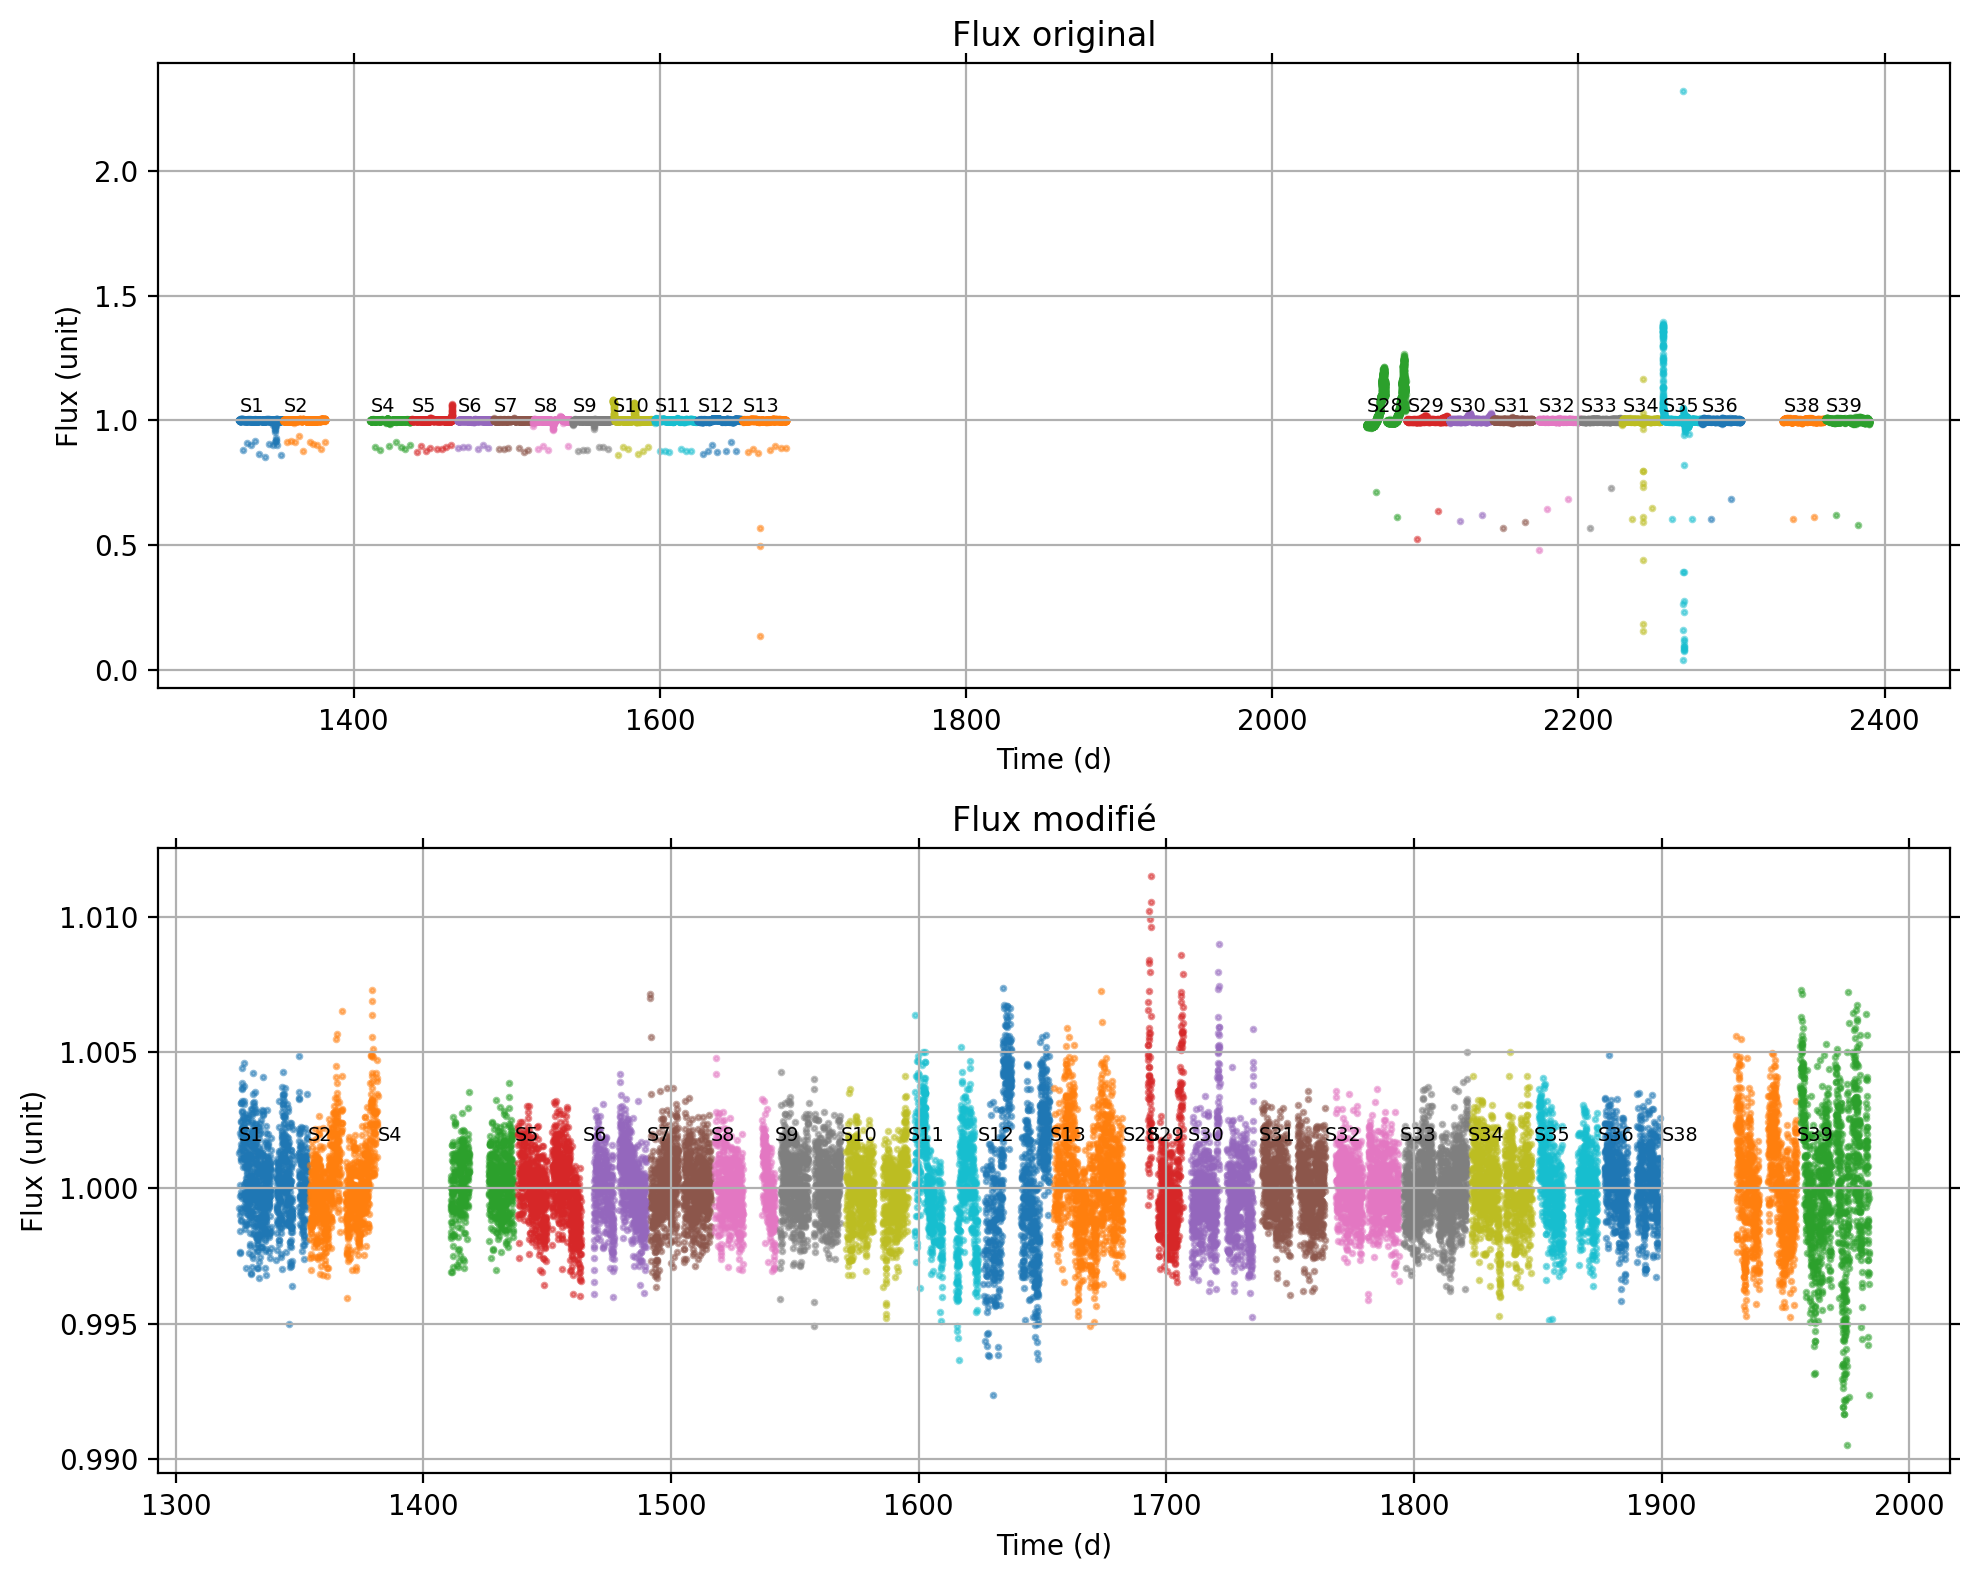

In [ ]:
lc = Lightcurve().load_qlp("../../4MOST/DATA/000000026050/0000000260501775/qlp/")

plt.close("all")
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8), dpi=200)

# plot the result in the first subplot
lc.plot_flux(ax=ax1, title="Flux original", by_sector=True)

# remove the 1y gap
lc.remove_data(lc.sector == 28)
lc.remove_large_jumps(90)
lc.remove_quality()
lc.remove_data(lc.sector == 28)
lc.resample(0.5 / 24)
lc.plot_flux(ax=ax2, title="Flux modifié", by_sector=True)

# original time, exactly the same as the one after loading
lc.original_time

# original to current time conversion table: for each value in `lc.time`, we can search it in `lc.corresponding_time`.
# We will find it at index `idx` (using binary search, O(log n) so no problem). Then, `lc.original_time[idx]` will correspond
# to the original time that was used to compute the given value; and `lc.original_quality[idx]` will be its quality,
# and `lc.original_sector[idx]` will be its sector number.
lc.corresponding_time

# as explained: the sector number for each value of `lc.time` using our previous conversion method
lc.sector

# and the same for quality; however for the moment the naive method is used: performing the search could provide multiple
# indexes (because 3 original time bins can be used for 1 final bin after resampling for example), and so we should merge
# these quality values to do it correctly
lc.quality

fig.tight_layout()

In [3]:
ind = np.searchsorted(lc.corresponding_time, lc.time)

In [4]:
lc.corresponding_time[53387]
lc.time[-3]

1983.8019439617317

In [5]:
orig = lc.original_time[ind]

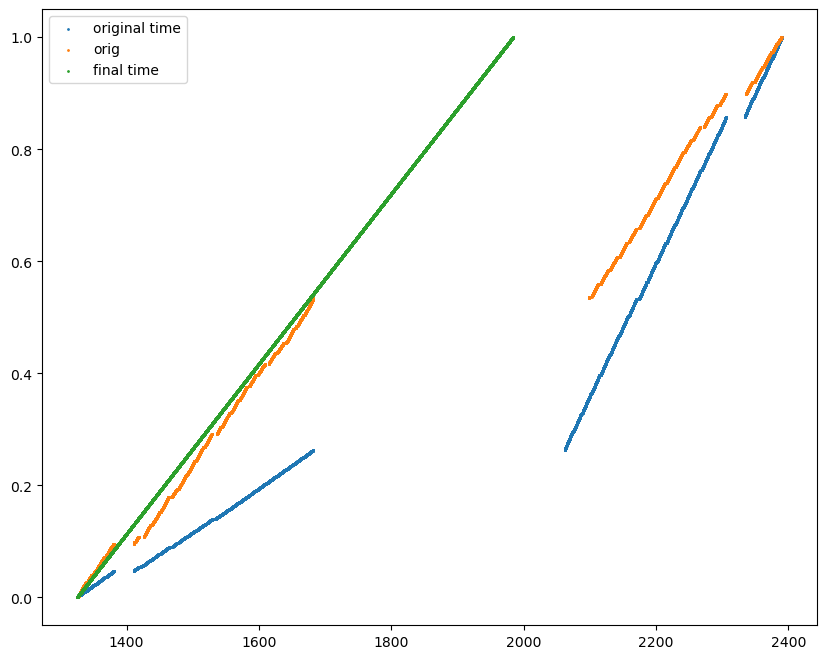

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(lc.original_time, np.linspace(0, 1, len(lc.original_time)), s=1, label="original time")
plt.scatter(
    orig[np.isfinite(lc.flux)],
    np.linspace(0, 1, len(orig[np.isfinite(lc.flux)])),
    s=1,
    label="orig",
)
plt.scatter(lc.time, np.linspace(0, 1, len(lc.time)), s=1, label="final time")
plt.legend()